In [14]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
data, target = mnist["data"], mnist["target"]
print(f"data의 type : {type(data)},  data의 shape : {data.shape}")
print(f"target의 type : {type(target)},  target의 shape : {target.shape}")

data의 type : <class 'pandas.core.frame.DataFrame'>,  data의 shape : (70000, 784)
target의 type : <class 'pandas.core.series.Series'>,  target의 shape : (70000,)


In [4]:
target.dtypes

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], ordered=False)

In [17]:
data, target = mnist["data"], mnist["target"]

In [18]:
# Since data type of all elements of target is string, we'll convert them into integer
target = target.astype(np.int8)

# We'll extract only values from data and target.
data, target = data.values, target.values.reshape(1, -1)

print(f"data의 type :   {type(data)},  data의 shape : {data.shape}")
print(f"target의 type : {type(target)},  target의 shape : {target.shape},   target element의 type : {type(target[0])}")

data의 type :   <class 'numpy.ndarray'>,  data의 shape : (70000, 784)
target의 type : <class 'numpy.ndarray'>,  target의 shape : (1, 70000),   target element의 type : <class 'numpy.ndarray'>


In [19]:
target_dict = {}
label, freq = np.unique(target, return_counts=True)
for l, f in zip(label, freq):
    target_dict[l] = f
    
print(target_dict)

{0: 6903, 1: 7877, 2: 6990, 3: 7141, 4: 6824, 5: 6313, 6: 6876, 7: 7293, 8: 6825, 9: 6958}


In [20]:
# Normalize data to keep our gradients manageable
data = data / 255
print(np.max(data), np.min(data))

1.0 0.0


In [21]:
# To build a zero-classifier, map target value of 0 into 1 and map all other target values into 0
target_new = np.zeros(target.shape)
target_new[np.where(target == 0)] = 1
target = target_new

In [22]:
np.unique(target, return_counts=True)

(array([0., 1.]), array([63097,  6903], dtype=int64))

In [24]:
# We'll split data into train and test set. We also transpose data to keep each example as a column.
m = 60000
m_test = data.shape[0] - m

x_train, x_test = data[:m].T, data[m:].T
y_train, y_test = target[:, :m], target[:, m:]

print(f"x_train의 shape : {x_train.shape},   y_train의 shape : {y_train.shape}")
print(f"x_test의  shape : {x_test.shape},   y_test의 shape :  {y_test.shape}")

x_train의 shape : (784, 60000),   y_train의 shape : (1, 60000)
x_test의  shape : (784, 10000),   y_test의 shape :  (1, 10000)


In [26]:
# We'll shuffle the training set for a good measure
np.random.seed(138)
shuffle_index = np.random.permutation(m)
x_train, y_train = x_train[:, shuffle_index], y_train[:, shuffle_index]

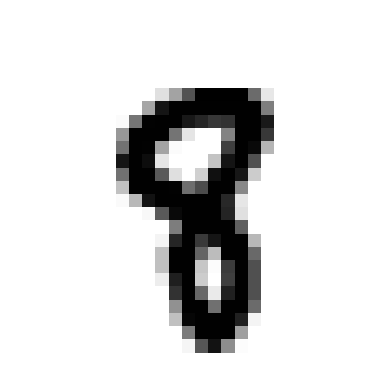

0.0


In [28]:
i = 3
plt.imshow(x_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[0][i])

In [29]:
def sigmoid(z):
    s = 1.0 / (1.0 + np.exp(-z))
    return s

In [30]:
def compute_loss(y, y_hat):
    m = y.shape[1]
    loss = -(1/m) * np.sum(np.multiply(y, np.log(y_hat)) + np.multiply((1-y), np.log(1-y_hat)))
    return loss

In [48]:
m = 60000
learning_rate = 1

X, Y = x_train, y_train
n_x, m = X.shape[0], X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

Z = np.matmul(W.T, X) + b
A = sigmoid(Z)

cost = compute_loss(Y, A)

dW = (1/m) * np.matmul(X, (Y-A).T)
db = (1/m) * np.sum(Y-A)

W -= learning_rate * dW
b -= learning_rate * db

print(f"W의 shape : {W.shape}\nX의 shpae : {X.shape}\nb의 shape : {b.shape}\nZ의 shape : {Z.shape}\nA의 shape : {A.shape}\ncost의 value : {cost}")
print(f"dW의 shape : {dW.shape}\ndb의 shape : {db.shape}, Y의 shape {Y.shape}")

W의 shape : (784, 1)
X의 shpae : (784, 60000)
b의 shape : (1, 1)
Z의 shape : (1, 60000)
A의 shape : (1, 60000)
cost의 value : 0.7305677527630355
dW의 shape : (784, 1)
db의 shape : (), Y의 shape (1, 60000)


In [47]:
learning_rate = 1

X, Y = x_train, y_train
n_x, m = X.shape[0], X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(2001):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)
    
    cost = compute_loss(Y, A)
    
    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A - Y)

    W -= learning_rate * dW
    b -= learning_rate * db
    
    if i % 100 == 0:
        print(f"Epoch {i:4d}의 cost : {cost}")
print()       
print(f"Final cost : {cost}")

Epoch    0의 cost : 0.6758641519151931
Epoch  100의 cost : 0.04133281689074956
Epoch  200의 cost : 0.03579976008138034
Epoch  300의 cost : 0.0332314557417711
Epoch  400의 cost : 0.031629161455664564
Epoch  500의 cost : 0.03048897359762472
Epoch  600의 cost : 0.02961702370748476
Epoch  700의 cost : 0.02891977951416142
Epoch  800의 cost : 0.02834509133742886
Epoch  900의 cost : 0.027860851728961113
Epoch 1000의 cost : 0.02744584708342609
Epoch 1100의 cost : 0.027085316327782268
Epoch 1200의 cost : 0.02676857795744784
Epoch 1300의 cost : 0.026487662975117617
Epoch 1400의 cost : 0.026236478778907335
Epoch 1500의 cost : 0.02601027268450182
Epoch 1600의 cost : 0.025805274075660058
Epoch 1700의 cost : 0.02561844796714981
Epoch 1800의 cost : 0.02544732071112149
Epoch 1900의 cost : 0.02528985390957628
Epoch 2000의 cost : 0.025144351407722372

Final cost : 0.025144351407722372


In [49]:
# To assess how well training performs, we'll see some accuracy measure
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, x_test) + b
A = sigmoid(Z)

predictions = (A > 0.5)[0, :]
labels = (y_test == 1)[0, :]

print(confusion_matrix(predictions, labels)) 

[[   0    0]
 [9020  980]]


In [55]:
Z = np.matmul(W.T, x_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))

[[   0    0]
 [9020  980]]


In [51]:
predictions.shape, labels.shape

((10000,), (10000,))

In [54]:
print(np.sum(A[0] > 0.5))

10000
